# Gun Violence Analysis - First Version

**Team 3**  
Kyle Wright  
Rachel Lee  
Saira Gurung  
  
This project is inspired by an article in [Vox](https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts) on America’s unique gun violence problem, explained in 17 maps and charts. The project is divided into three parts - data exploratory, first version and revised version. 
  
The following analysis is for our first version, which continues the work from our data exploratory phase on Gun Violence in the United States between 2014 - 2016 with data from [Gun Violence Archive](https://www.gunviolencearchive.org/). In this version, we explored the dataset to find trends of injuries and death from gun violence in the U.S..

# Changes from Data Exploratory

In our Data Exploratory analysis, we had initially planned to used the dataset to explore these three findings:
<ol>
    <li>Is there a correlation between Police involvement and crimes also involving children and teens?</li>
    <li>Is there seasonality to gun violence?</li>
    <li>Frequency of police involvement in acts of gun violence?</li>
</ol>

However, after running more analysis on the dataset during our First Version, we found that it was not feasible to continue with the findings for police involvement due to a lack of data. Hence, we changed the direction of our analysis, looking more towards the seasonality and trend of incidents by category.


<hr/>

# Introduction

Among developed nations, the US is far and away the most homicidal — in large part due to the easy access many Americans have to firearms.

# Search for Dataset

We were interested in exploring injuries and death trend from gun violence, including accidental, intentional, mass shootings and officer involved shootings. After looking at several datasets available online, we selected one from Kaggle which was taken from Gun Violence Archive. Gun Violence Archive is a not-for-profit corporation formed in 2013 that provides free online public access to accurate information about gun-related violence in the United States, compiled from over 2500 law enforcement, media, commercial and government sources daily.

# Understanding the dataset

The data source is comprised of data from a gun violence database that contains gun violence events in the years 2014, 2015, and 2016. In total, we had 14 csv files that were categorized by the type of incident (accidental/intentional/mass shooting/police involvement) as well as by age groups (children/teen/adult).

Within each category and age group incidents, the data provides a count of victims killed or injured for each incident. There is also data that shows mass shooting occurences that correspond to one or many of the categorized occurences. The data spans the years of 2014, 2015, and 2016 with state, city/county, and address to match. 

There are three groups for Age:
  - **Children**: Ages 0-11
  - **Teens**: Ages 12-17
  - **Adults**: Ages 18+

Thre are four Categories of incidents:
  - **Accidental**: Incidents that were due to playing, negligent handling, unsupervised gun handling
  - **Intentional**: Incidents of murder, suicide. Mass Shootings also account towards intentional incidents
  - **Officers Involved**: Incidents where police officers were involved (killed, injured, or fired his weapon)
  - **Mass Shootings**: Incidents where 4+ victims were injured or killed, excluding the subject/suspect/perpetrator, in one location

In each of the files, 1 row represented 1 incident from gun violence for that particular age group and incident type.

Each file contained the same data structure with the following columns:

    
|Column Name|Explanation |
|-----------|------------|
| Incident Date|The date of the incident|
|State|The state in which the incident occurred|
|City Or County|The city or county of the state where the incident occured|
|Address|The adress of the location the incident occured|
|# Killed|The total count of people killed as a result of the incident|
|# Injured|The total count of people who were injured as a result of the incident   |
|Operations|NaN|
  

**NOTE**: On the Gun Violence Archive website, the `Operations` column contained links to a report summarizing the incident, which were not included in the exported dataset.

We obtained our data set from Kaggle.
Data Source: https://www.kaggle.com/gunviolencearchive/gun-violence-database#teens_killed.csv

A more updated version (up till 2019) is available on Gun Violence Archive's website.
https://www.gunviolencearchive.org/reports

Although a more updated dataset is available, we decided to remain with just data from 2014 - 2016 to focus our analysis on these three years.

# Audience

Our audience for this analysis is aimed at the general public to create a greater awareness of gun violence in the U.S.

# Findings

Finding 1: Intentional gun violence leads to more deaths while accidental incidents result in a smaller number of deaths.

Finding 2: Gun violence incidents tend to rise when the weather is warmer or during the general hunting season in the later half of the year.

Finding 3: States with the highest number of gun crimes does not necessarily have the largest average number of deaths or injuries occurring from the incidents.


<hr/>

# Making Of

Since the original dataset consists of many csv files, we first cleaned the dataset using python and then combined the dataset. The combined dataset was then exported into a single csv file for further analysis. Using a mixture of Altair and Tableau, we created visualizations of our findings.

## Importing dataset and python libraries

Importing python required libraries for analysis such as pandas, numpy, altair.

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import altair as alt
alt.renderers.enable('notebook')
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

We import the cleaned dataset prepared in our data exploratory phase into a pandas dataframe called df.

In [2]:
df = pd.read_csv('Data/gun_violence.csv')

Convert `Incident Date` to a datetime object for use in analysis using Altair below, as Altair is unable to read a string formated date.

In [3]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], format="%B %d, %Y")

Drop `Unnamed` column, which does not provide any value to our analysis.

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

## Setting up color palette

We set a color palette for the visualization so that all our referencing for the Categories will be consistent.

We check to see what are all the available Categories.

In [5]:
df.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

Using the ColorBrewer website (http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=4), we determine a color palette that is photocopy safe.

In [6]:
palette = alt.Scale(domain=['Accidental', 'Intentional', 'Mass Shootings','Police Involvement'], \
                  range=['#2b83ba', '#fdae61', '#abdda4','#d7191c'])

<hr/>

## Developing the visualizations

###  1. Injuries and deaths and the correlation to its category

Creating a copy of the imported dataset's dataframe so that we can run analysis and manipulate the dataset without modifying the original imported dataset. The new dataframe is called df1.

In [7]:
df1 = df.copy()

In [8]:
df1 = df1.set_index(['Incident Date','Address']).sort_values('Incident Date', ascending=True)

Assigning binary values to killed and injured

Groupby `Incident Date` and `Category` to get the sum of # Killed and # Injured by date and category

In [9]:
df2 = df1.groupby(['Incident Date','Category']).sum().reset_index()

In [10]:
source = df2

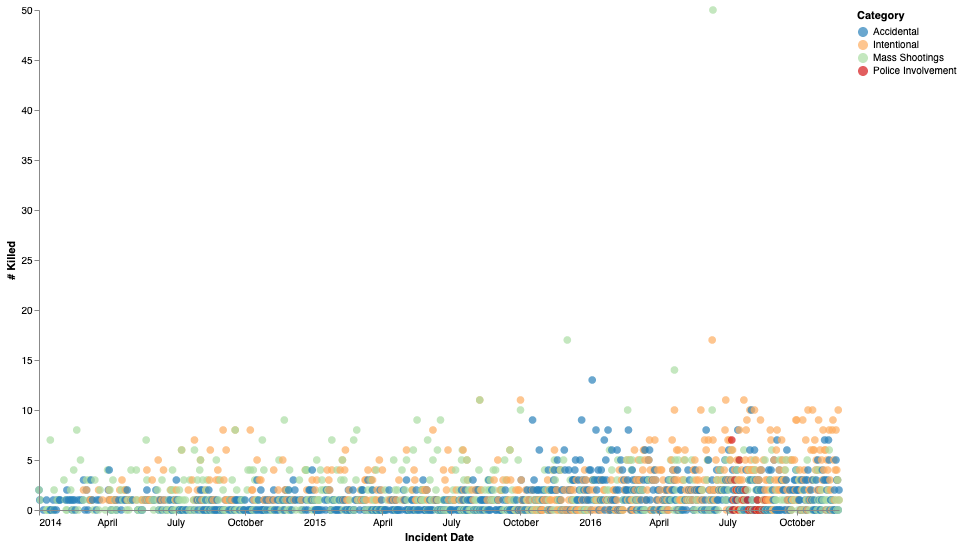

In [11]:
chart = alt.Chart(source).mark_circle(size = 60).encode(
    x = 'Incident Date',
    y = '# Killed',
    color = alt.Color('Category', scale=palette),
    tooltip = ['Category','Incident Date','# Killed','# Injured']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 800,
    height = 500
)

#### Narrative
We were interested in the correlation between gun incident types and the category associated. This visualization is able to show the amount of killings per category over the range of dates in the data set. From here we can visually see that intentional incidents occur most often in the 5 to 10 death range, while accident incidents occur with 1 to 2 deaths most often. Hovering over each incident will give the category, date, injuries, and death.


#### Data Wrangling
1. Delete duplicates from the data set
2. Drop unneeded columns
3. Group by Data and category to acquire the sum of these category's statistics

#### Road Map
1. Include Age in the analysis
2. Include Injuries in a better way than tooltips to the visualization

### 2. Seasonality to gun violence

#### We look at the pattern for each incident category

We first begin by making a copy of the dataframe for analysis and renaming the column `Incident Date` to `Date`.

In [12]:
df_seasonality = df.copy()
df_seasonality.rename(columns={'Incident Date': 'Date'}, inplace=True)

In [13]:
df_seasonality.sample(10)

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age
4359,2016-04-09,Alabama,Anniston,West 15th Street and Crawford Avenue,0,4,NaN,Mass Shootings,NaN
2217,2015-11-12,Texas,Midland,Neely Avenue,0,1,NaN,Accidental,Teen
2440,2014-09-18,Illinois,Chicago,1300 block of North Cleveland Avenue,1,1,NaN,Accidental,Teen
2549,2016-09-25,Illinois,Joliet,East Washington and Richards,1,2,NaN,Intentional,Child
75,2016-09-30,Georgia,Atlanta,Roswell Street SW,1,0,NaN,Accidental,Adult
181,2016-06-29,Kentucky,Lewisport,1370 S Chestnut Grove Rd,1,0,NaN,Accidental,Adult
2517,2016-10-17,California,Fresno,4136 North Thesta Street,0,1,NaN,Intentional,Child
572,2016-01-20,Louisiana,New Orleans,5600 block of Red Maple Drive,1,0,NaN,Accidental,Child
2211,2015-11-21,Georgia,Jefferson,NaN,0,1,NaN,Accidental,Teen
66,2016-10-09,South Dakota,Sioux Falls,North 1st Avenue,1,0,NaN,Accidental,Adult


Assigning a Period to each incident (Quarter).

In [14]:
df_seasonality['Period'] = df_seasonality.Date.apply(lambda x: x.to_period("Q").to_timestamp())

In [15]:
df_seasonality.head()

,Date,State,City Or County,Address,# Killed,# Injured,Operations,Category,Age,Period
0,2016-11-26,Maryland,Sabillasville,6600 block of Eylers Valley Flint Road,1,0,NaN,Accidental,Adult,2016-10-01
1,2016-11-26,Ohio,Grand Rapids,SR Route 65,1,0,NaN,Accidental,Adult,2016-10-01
2,2016-11-24,New York,Sandy Creek,Kehoe Road,1,0,NaN,Accidental,Adult,2016-10-01
3,2016-11-24,Florida,Black Point,NaN,1,0,NaN,Accidental,Adult,2016-10-01
4,2016-11-23,Michigan,Powell Township,North 1311 County Road KCI,1,0,NaN,Accidental,Adult,2016-10-01


Checking the available unique categories of incidents.

In [16]:
df_seasonality.Category.unique()

array(['Accidental', 'Intentional', 'Mass Shootings',
       'Police Involvement'], dtype=object)

Create a new dataframe for plotting the chart on gun violence occurence by period.

In [17]:
seasonality = df_seasonality.groupby(['Period', 'Category'], as_index=False)['Date'].count().rename(columns={'Date':'Count'})

In [18]:
seasonality.head()

,Period,Category,Count
0,2014-01-01,Accidental,54
1,2014-01-01,Intentional,9
2,2014-01-01,Mass Shootings,50
3,2014-04-01,Accidental,52
4,2014-04-01,Intentional,40


#### Overall seasonality of gun violence in the United States between 2014 - 2016

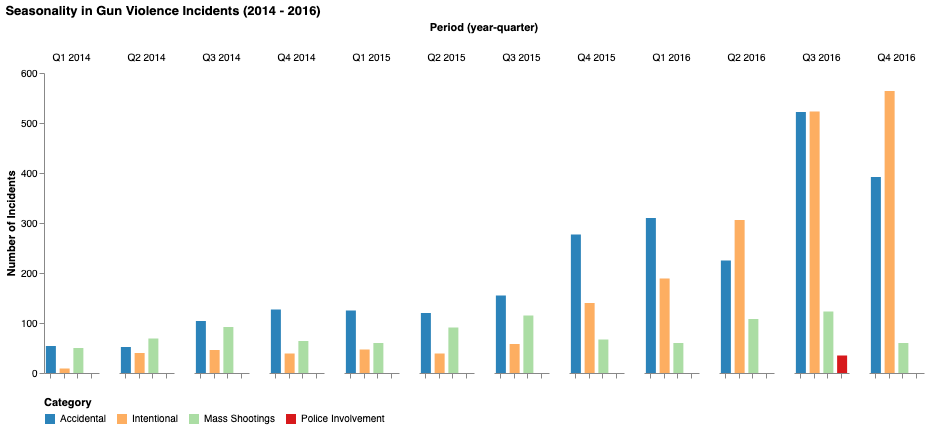

In [19]:
chart = alt.Chart(seasonality, title='Seasonality in Gun Violence Incidents (2014 - 2016)', name='seasonality') \
        .mark_bar(size=10) \
        .encode(
    column = alt.Column('Period', timeUnit='yearquarter'),
    x = alt.X('Category', axis=alt.Axis(labels=False, title=None)),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=palette),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 55
).configure_legend(
     orient = "bottom"
)

From the above chart, we can see that there is an increasing tren of gun violence in both accidental and intentional incidents from 2014 to 2016. While there is a lot of news and focus on Mass Shooting incidents, comparing to accidental and intentional incidents, mass shooting occurance is only a small fraction of overall gun violence in America and the figure generally stays below 100 incident per quarter.

#### Visualizing Individual Categories by Month

Visualizing the trend for Accidental Gun Violence Incidents by months to see seasonality.

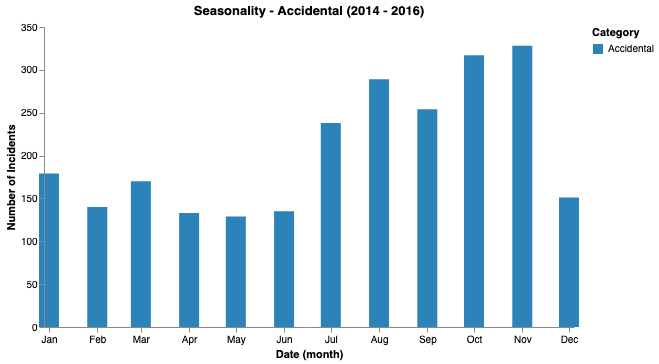

In [20]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Accidental'], title='Seasonality - Accidental (2014 - 2016)', name='seasonality_accidental') \
        .mark_bar(size=20, color='#1f77b4') \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#2b83ba'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Intentional Gun Violence Incidents by months to see seasonality.

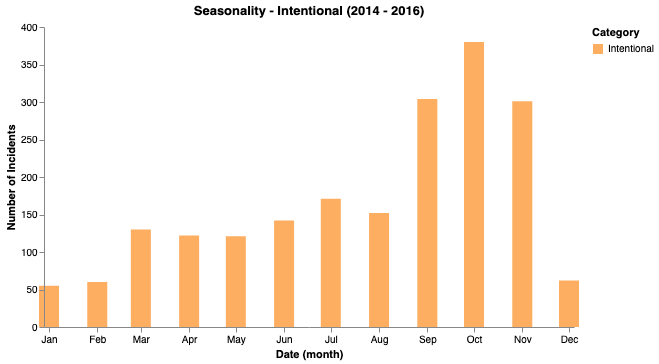

In [21]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Intentional'], title='Seasonality - Intentional (2014 - 2016)', name='seasonality_intentional') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#fdae61'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Mass Shootings Gun Violence Incidents by months to see seasonality.

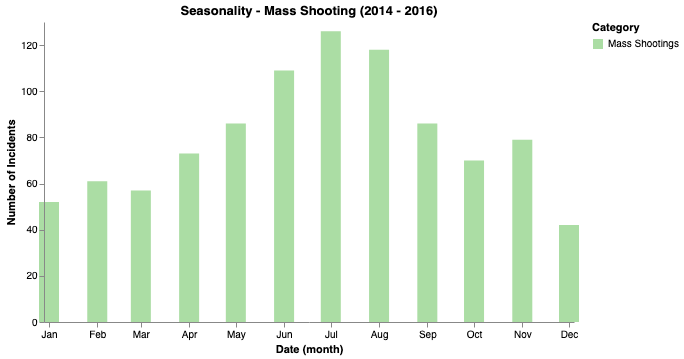

In [22]:
chart = alt.Chart(df_seasonality[df_seasonality['Category'] == 'Mass Shootings'], title='Seasonality - Mass Shooting (2014 - 2016)', name='seasonality_mass') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Date', timeUnit='month'),
    y = alt.Y('count(Date)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#abdda4'])),
    tooltip = ['count(Date)', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

Visualizing the trend for Police Involvement Gun Violence Incidents by months to see seasonality.

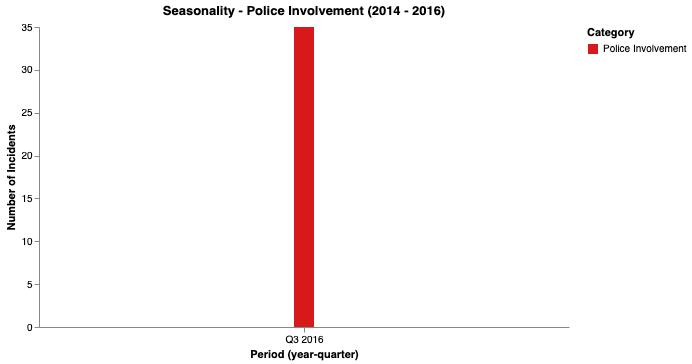

In [23]:
chart = alt.Chart(seasonality[seasonality['Category'] == 'Police Involvement'], title='Seasonality - Police Involvement (2014 - 2016)', name='seasonality_police') \
        .mark_bar(size=20) \
        .encode(
    x = alt.X('Period', timeUnit='yearquarter'),
    y = alt.Y('sum(Count)', axis=alt.Axis(title='Number of Incidents')),
    color = alt.Color('Category', scale=alt.Scale(range=['#d7191c'])),
    tooltip = ['Period', 'Count', 'Category']
)
chart.configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    width = 530
)

From this chart, we realised that there is a lack of data in police involved incidents. Thus, we decided to drop our initial plans to analyze trends of gun violence incidents involving police.

#### Observations

Looking at the charts, we can see that:
<ol>
    <li>There is an overall increasing trend to gun violence incidents in the United States between 20014 - 2018.</li>
    <li>There is a sudden spike in 2016 Q3 in Accidental and Intentional incidents from previous quarters.</li>
    <li>There is a higher occurence of Mass Shootings in Q3 compared to other quarters in all years.</li>
    <li>Accidental gun violence incidents are more common in the second half (July - December) of the year, with November recording the highest.</li>
    <li>Beginning March 2014, there is at least 1 reported incident of gun violence in the United States each month.</li>
</ol>
    

#### Narrative

The above charts indicates that there is a seasonality to gun violence incidents, in that they usually occur during months with a holiday season or when the weather is warmer. For example, total Mass Shooting incidents in July is 142% higher than in January at 126 and 52 incidents, respectively. And while November and December are both festive months, November recorded a total of 328 incidents compared to 151 incidents in December for accidental incidents, a 117% difference.

### 3. Relationship between gun crimes across states and the average number of injuries or deaths

The following visualizations was created using Tableau as part of a data exploratory workbook, which can be found here: https://public.tableau.com/profile/saira.gurung#!/vizhome/GunViolenceinUSA/Overalltrendandrelationshipofshootinginstancesandnumberofpeopleinjuredorkilledfrom2014to2016

![](Visualizations/2.png?raw=true)

#### Total gun violation occurence in the US categorized by different states in the order of most incidents to least.

![](Visualizations/6.png?raw=true)

#### Comparison of states within the US with highest average number of deaths or injuries due to gun violence crimes.

![](Visualizations/3.png?raw=true)

#### States with the highest number of deaths and injuries due to gun violence crimes.

### Narrative

Based on the above visualisations, the following can be deduced:
<ol>
<li>The states with the most average number of people injured from gun violence does not have the most average deaths from gun violence. </li>
<li>The states with largest number of gun crimes does not necessarily have the most severe consequence of people being injured or killed.</li>
<li>Some states may have lower number of gun crimes; however, those gun crimes have a more lethal effect. For instance, New Mexico is on the lower tail of the chart displaying total number of gun crimes, however, it has one of the most average number of deaths from gun violence thereby illustrating that gun violence in New Mexico tend to be more fatal.</li>
<li>States with warmer climate tend to have more instance of gun violence. </li>
</ol>

<hr/>

# Conclusion

Overall, gun violence in America is seeing an increasing trend, not only in incident occurrences, but also in victim counts, whether it be in numbers injured or killed. Additionally, months that have warmer temperatures or have major holiday/festive celebrations happenning are more likely to have gun violence incidents than months with lower temperatures. A quick search online on the corelation between temperatures and shooting incidents in the United States confirms this finding. One such report was an [article by The New York Times](https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html).

# Future Work

More work can be explored in terms of seasonality and the effects of weather on gun violence using the dataset. We can also run our analysis by victim age groups to see if there is also a pattern there.

<hr/>

# References

Dataset Source:  
**Kaggle** - https://www.kaggle.com/gunviolencearchive/gun-violence-database#officer_involved_shootings.csv  
**Gun Violence Archive** - https://www.gunviolencearchive.org/reports

Color Palette:  
**ColorBrewer 2.0** - http://colorbrewer2.org

Asher, J., (2018). A Rise in Murder? Let’s Talk About the Weather. _The New York Times_. Available at: https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html. Accessed on: May 25, 2019.

Tableau Link: https://public.tableau.com/profile/saira.gurung#!/vizhome/GunViolenceinUSA/Overalltrendandrelationshipofshootinginstancesandnumberofpeopleinjuredorkilledfrom2014to2016

[EOF]